In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

company_name = '5_Amazon'
file_path = f'~/Desktop/workspace/indeed/Job-Satisfaction/data/companies/{company_name}/{company_name[2:]}.csv'
df = pd.read_csv(file_path)

data_path = '~/Desktop/workspace/indeed/Job-Satisfaction/data/'

In [55]:
df.head()

,Unnamed: 0,Index,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture,Review_Title,Reviewer_Job_Title,Reviewer_Job_Status,Reviewer_Job_Location,Reviewed_Date,Review_Text,Pros,Cons,Reviewed_Year
0,0,1,3.0,4.0,5.0,2.0,4.0,3.0,The job was not bad,Stocker,Former Employee,"West Deptford, NJ",2019-07-13,The job was good but overly fast paced hard to...,NaN,NaN,2019
1,1,2,1.0,2.0,5.0,5.0,2.0,1.0,Very frustrating,Packer,Former Employee,"Monee, IL",2019-07-13,Managers were not professional just the whole ...,NaN,NaN,2019
2,2,3,2.0,2.0,0.0,2.0,2.0,2.0,Slave work,Fulfillment Associate,Former Employee,"San Bernardino, CA",2019-07-13,I have nothing to say really if you need a job...,NaN,NaN,2019
3,3,4,5.0,0.0,0.0,0.0,0.0,0.0,productive and fun place,Senior User Experience Designer,Current Employee,"Seattle, WA",2019-07-13,You can learn a lot very quickly in a very sho...,NaN,NaN,2019
4,4,5,5.0,5.0,3.0,4.0,3.0,4.0,A great place to work,Warehouse Associate,Current Employee,"Hazel Park, MI",2019-07-13,I have nothing but positive things to say abou...,NaN,NaN,2019


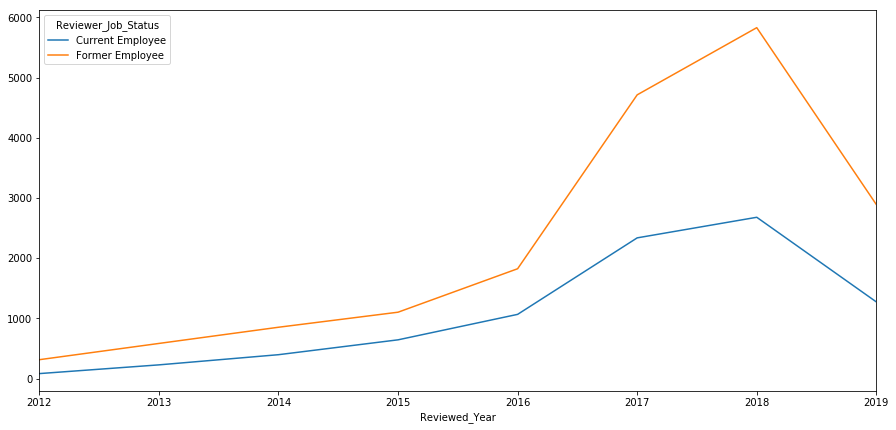

In [72]:
# df_ = df[df.Reviewed_Year == 2016]
# df_.head()
fig, ax = plt.subplots(figsize=(15, 7))

df = df[df.Reviewer_Job_Status.isin(['Former Employee', 'Current Employee'])]
df.head()
df.groupby(['Reviewed_Year', 'Reviewer_Job_Status'])['Reviewer_Job_Status'].count().unstack().plot(ax=ax)

In [19]:
df['Reviewed_Date'] = pd.to_datetime(df['Reviewed_Date'])

In [20]:
df.head()

,Unnamed: 0,Index,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture,Review_Title,Reviewer_Job_Title,Reviewer_Job_Status,Reviewer_Job_Location,Reviewed_Date,Review_Text,Pros,Cons,Reviewed_Year
0,0,1,3.0,4.0,5.0,2.0,4.0,3.0,The job was not bad,Stocker,Former Employee,"West Deptford, NJ",2019-07-13,The job was good but overly fast paced hard to...,NaN,NaN,2019
1,1,2,1.0,2.0,5.0,5.0,2.0,1.0,Very frustrating,Packer,Former Employee,"Monee, IL",2019-07-13,Managers were not professional just the whole ...,NaN,NaN,2019
2,2,3,2.0,2.0,0.0,2.0,2.0,2.0,Slave work,Fulfillment Associate,Former Employee,"San Bernardino, CA",2019-07-13,I have nothing to say really if you need a job...,NaN,NaN,2019
3,3,4,5.0,0.0,0.0,0.0,0.0,0.0,productive and fun place,Senior User Experience Designer,Current Employee,"Seattle, WA",2019-07-13,You can learn a lot very quickly in a very sho...,NaN,NaN,2019
4,4,5,5.0,5.0,3.0,4.0,3.0,4.0,A great place to work,Warehouse Associate,Current Employee,"Hazel Park, MI",2019-07-13,I have nothing but positive things to say abou...,NaN,NaN,2019


In [21]:
df['Reviewed_Year'] = df['Reviewed_Date'].dt.year

In [22]:
df.head()

,Unnamed: 0,Index,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture,Review_Title,Reviewer_Job_Title,Reviewer_Job_Status,Reviewer_Job_Location,Reviewed_Date,Review_Text,Pros,Cons,Reviewed_Year
0,0,1,3.0,4.0,5.0,2.0,4.0,3.0,The job was not bad,Stocker,Former Employee,"West Deptford, NJ",2019-07-13,The job was good but overly fast paced hard to...,NaN,NaN,2019
1,1,2,1.0,2.0,5.0,5.0,2.0,1.0,Very frustrating,Packer,Former Employee,"Monee, IL",2019-07-13,Managers were not professional just the whole ...,NaN,NaN,2019
2,2,3,2.0,2.0,0.0,2.0,2.0,2.0,Slave work,Fulfillment Associate,Former Employee,"San Bernardino, CA",2019-07-13,I have nothing to say really if you need a job...,NaN,NaN,2019
3,3,4,5.0,0.0,0.0,0.0,0.0,0.0,productive and fun place,Senior User Experience Designer,Current Employee,"Seattle, WA",2019-07-13,You can learn a lot very quickly in a very sho...,NaN,NaN,2019
4,4,5,5.0,5.0,3.0,4.0,3.0,4.0,A great place to work,Warehouse Associate,Current Employee,"Hazel Park, MI",2019-07-13,I have nothing but positive things to say abou...,NaN,NaN,2019


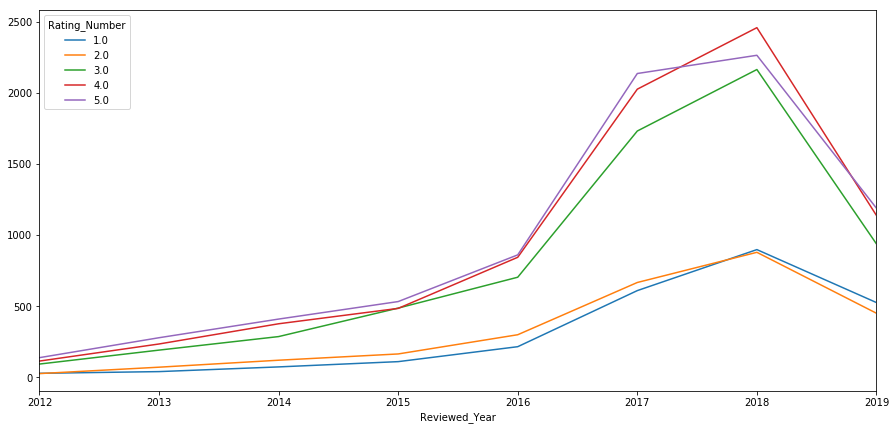

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))

df.groupby(['Reviewed_Year', 'Rating_Number'])['Rating_Number'].count().unstack().plot(ax=ax)

Text(0.5, 1.0, 'Rating over Years')

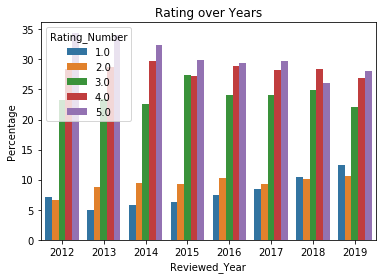

In [36]:
temp = df.groupby(['Reviewed_Year'])['Rating_Number'].value_counts(normalize=True)\
.mul(100).reset_index(name='Percentage')
sns.barplot(x='Reviewed_Year', y='Percentage', hue='Rating_Number', data=temp).set_title("Rating over Years")

In [47]:
#Let's see if that generalizes over all data
df_company_list = pd.read_csv(data_path + '/scraper_data/review_site.csv')

def merge_companies(companies_list=range(1, 51)):
    df_companies = pd.DataFrame()
    for company_index in companies_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        company_path = data_path + f'/companies/{company_index}_{company_name}/{company_name}.csv'
        df_company = pd.read_csv(company_path)
        df_companies = pd.concat([df_companies, df_company]).reset_index(drop=True)
    return df_companies

df_companies = merge_companies()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [48]:
df_companies.head()

,Benefits,Cons,Culture,Index,Job_Advancement,Management,Pros,Rating_Number,Review_Text,Review_Title,Reviewed_Date,Reviewed_Year,Reviewer_Job_Location,Reviewer_Job_Status,Reviewer_Job_Title,Unnamed: 0,Unnamed: 0.1,Work_Life
0,3.0,NaN,4.0,0,4.0,3.0,NaN,3.0,They are all different I got lucky and had a g...,Decent,2019-03-08,2019,"Price, UT",Former Employee,Service Manager,0,NaN,4.0
1,0.0,NaN,3.0,1,3.0,3.0,NaN,3.0,Walmart is a good company with great benefits...,Walmart is great opportunity for people lookin...,2019-07-13,2019,"Charleston, SC",Current Employee,Team Lead,1,NaN,3.0
2,4.0,NaN,4.0,2,4.0,3.0,NaN,4.0,Just a good place to work i really enjoyed wor...,It was a good place to work laid back had alot...,2019-07-13,2019,"Riverdale, GA",Former Employee,Stocker,2,NaN,4.0
3,0.0,NaN,0.0,3,0.0,0.0,NaN,5.0,It's a fast paste job you have to keep up with...,Best job for anybody to work at,2019-07-13,2019,"Portage, IN",Former Employee,Walmart Stocker,3,NaN,0.0
4,1.0,NaN,1.0,4,2.0,1.0,NaN,1.0,Everything Walmart does is unethical. From as...,Not a place to work,2019-07-13,2019,"Bellevue, WA",Former Employee,Customer Service Representative,4,NaN,1.0


In [49]:
print(df.shape)
print(df_companies.shape)

(27268, 17)
(682176, 18)


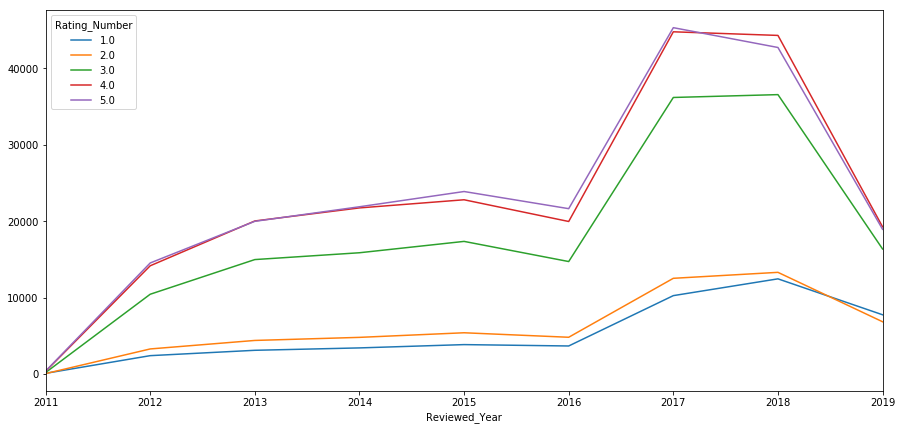

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))

df_companies.groupby(['Reviewed_Year', 'Rating_Number'])['Rating_Number'].count().unstack().plot(ax=ax)

Text(0.5, 1.0, 'Rating over Years')

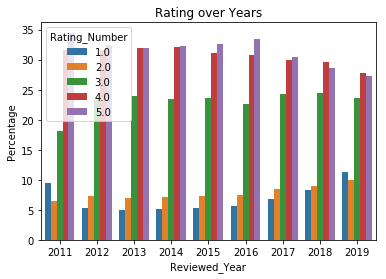

In [52]:
temp = df_companies.groupby(['Reviewed_Year'])['Rating_Number'].value_counts(normalize=True)\
.mul(100).reset_index(name='Percentage')
sns.barplot(x='Reviewed_Year', y='Percentage', hue='Rating_Number', data=temp).set_title("Rating over Years")

In [53]:
df_companies = df_companies[df_companies.Reviewed_Year == 2016]

df_companies.head()

,Benefits,Cons,Culture,Index,Job_Advancement,Management,Pros,Rating_Number,Review_Text,Review_Title,Reviewed_Date,Reviewed_Year,Reviewer_Job_Location,Reviewer_Job_Status,Reviewer_Job_Title,Unnamed: 0,Unnamed: 0.1,Work_Life
87587,1.0,Everything else,1.0,87587,1.0,1.0,Lived nearby,1.0,Try somewhere else the pay is minimum wage the...,"Low pay,schedule is all over the place",2016-12-31,2016,"Greenville, TX",Former Employee,Electronics Sales Associate,87587,NaN,1.0
87588,1.0,They don't care about you or your family every...,1.0,87588,1.0,1.0,Nothing,1.0,Worst company to work for hate it and is peopl...,Hate it,2016-12-31,2016,"Monroe, WA",Current Employee,Manager,87588,NaN,1.0
87589,2.0,no benefits,3.0,87589,2.0,1.0,meeting new people and learning to decorate ca...,3.0,Productive and fun but the managment was horri...,productive and fun.,2016-12-31,2016,"Decatur, AL",Former Employee,cake decorator/ cashier,87589,NaN,3.0
87590,3.0,NaN,2.0,87590,3.0,3.0,NaN,3.0,working at Walmart was enjoyable the managemen...,fun places to work/fast paces,2016-12-31,2016,"Beverly Hills, FL",Former Employee,Assistant Manager,87590,NaN,2.0
87591,3.0,Standing on cement floor for the whole time.,4.0,87591,3.0,4.0,Awesome people to work with,4.0,It was it's own department so we didn't have t...,Jewelry Department,2016-12-31,2016,"Centennial, CO",Former Employee,Jewelry Sales Associate/Cashier,87591,NaN,5.0
